## 知识点梳理
1. 相关概念（生成模型、判别模型)
2. 先验概率、条件概率
3. 贝叶斯决策理论
4. 贝叶斯定理公式
5. 极值问题情况下的每个类的分类概率
6. 下溢问题如何解决
7. 零概率问题如何解决？
8. 优缺点
9. sklearn参数详解，Python绘制决策树



### 1. 生成模型、判别模型

* 生成模型：在概率统计理论中, 生成模型是指能够随机生成观测数据的模型，尤其是在给定某些隐含参数的条件下。它给观测值和标注数据序列指定一个联合概率分布。在机器学习中，生成模型可以用来直接对数据建模（例如根据某个变量的概率密度函数进行数据采样），也可以用来建立变量间的条件概率分布。条件概率分布可以由生成模型根据贝叶斯定理形成。常见的基于生成模型算法有高斯混合模型和其他混合模型、隐马尔可夫模型、随机上下文无关文法、朴素贝叶斯分类器、AODE分类器、潜在狄利克雷分配模型、受限玻尔兹曼机  
<br>举例：要确定一个瓜是好瓜还是坏瓜，用判别模型的方法是从历史数据中学习到模型，然后通过提取这个瓜的特征来预测出这只瓜是好瓜的概率，是坏瓜的概率。
<br>

* 判别模型: 在机器学习领域判别模型是一种对未知数据 y 与已知数据 x 之间关系进行建模的方法。判别模型是一种基于条件概率理论的方法。已知输入变量 x ，判别模型通过构建条件概率分布 P(y|x) 预测 y 。常见的基于判别模型算法有逻辑回归、线性回归、支持向量机、提升方法、条件随机场、人工神经网络、随机森林、感知器
<br><br>举例：利用生成模型是根据好瓜的特征首先学习出一个好瓜的模型，然后根据坏瓜的特征学习得到一个坏瓜的模型，然后从需要预测的瓜中提取特征，放到生成好的好瓜的模型中看概率是多少，在放到生产的坏瓜模型中看概率是多少，**哪个概率大就预测其为哪个**。
<br>

从概率分布的角度考虑，对于一堆样本数据，每个均有特征Xi对应分类标记yi。

生成模型：学习得到联合概率分布P(x,y)，即特征x和标记y共同出现的概率，然后求条件概率分布。能够学习到数据生成的机制。

判别模型：学习得到条件概率分布P(y|x)，即在特征x出现的情况下标记y出现的概率。

数据要求：生成模型需要的数据量比较大，能够较好地估计概率密度；而判别模型对数据样本量的要求没有那么多。


生成模型是所有变量的全概率模型，而判别模型是在给定观测变量值前提下目标变量条件概率模型。**因此生成模型能够用于模拟（即生成）模型中任意变量的分布情况，而判别模型只能根据观测变量得到目标变量的采样。**判别模型不对观测变量的分布建模，因此它不能够表达观测变量与目标变量之间更复杂的关系。因此，生成模型更适用于无监督的任务，如分类和聚类。

### 2. 条件概率、先验概率、后验概率
条件概率: 就是事件A在事件B发生的条件下发生的概率。条件概率表示为P（A|B），读作“A在B发生的条件下发生的概率”。


先验概率: 在贝叶斯统计中，某一不确定量 p 的先验概率分布是在考虑"观测数据"前，能表达 p 不确定性的概率分布。它旨在描述这个不确定量的不确定程度，而不是这个不确定量的随机性。这个不确定量可以是一个参数，或者是一个隐含变量。


后验概率: 在贝叶斯统计中，一个随机事件或者一个不确定事件的后验概率是在考虑和给出相关证据或数据后所得到的条件概率。同样，后验概率分布是一个未知量（视为随机变量）基于试验和调查后得到的概率分布。“后验”在本文中代表考虑了被测试事件的相关证据。


通过上述西瓜的数据集来看

条件概率，就是在条件为瓜的颜色是青绿的情况下，瓜是好瓜的概率

先验概率，就是常识、经验、统计学所透露出的“因”的概率，即**瓜的颜色是青绿的概率。**

后验概率，就是在知道“果”之后，去推测“因”的概率，也就是说，**如果已经知道瓜是好瓜，那么瓜的颜色是青绿的概率是多少。**后验和先验的关系就需要运用贝叶斯决策理论来求解。

### 3. 贝叶斯决策理论
贝叶斯决策论是概率框架下实施决策的基本方法，对分类任务来说，在所有相关概率都已知的理想情形下，贝叶斯决策论考虑如何基于这些概率和误判损失来选择最优的类别标记。

假设有N种可能标记， $λ_{ij}$是将类$c_j$误分类为$c_i$所产生的损失，基于后验概率$ P(c_i | x)$ 可以获得：

* 样本x分类为$c_i$所产生的期望损失 ，即在样本x上的条件风险：

$$R(c_i|\mathbf{x}) = \sum_{j=1}^N \lambda_{ij} P(c_j|\mathbf{x})$$
我们的任务是寻找一个**判定准则 $h:X→Y$**以最小化总体风险

$$R(h)= \mathbb{E}_x [R(h(\mathbf(x)) | \mathbf(x))]$$

显然，对每个样本x，若h能最小化条件风险 $R(h((x))|(x))$,则总体风险R(h)也将被最小化。这就产生了贝叶斯判定准则：为最小化总体风险，只需要在每个样本上选择那个能使条件风险R(c|x)最小的类别标记，即：

$$h^* (x) = argmin_{c\in y} R(c|\mathbf{x})$$
此时，h 称作贝叶斯最优分类器，与之对应的总体风险R(h )称为贝叶斯风险，1-R(h*)反映了分类器能达到的最好性能，即机器学习所产生的模型精度的上限。

具体来说，若目标是最小化分类错误率（对应0/1损失），则$λ_{ij}$可以用0/1损失改写，得到条件风险和最小化分类错误率的最优分类器分别为：
$$R(c|\mathbf{x}) = 1- P(c|\mathbf{x})$$

$$h^*(x) = argmax_{c\in \mathcal{Y}} P(c|\mathbf{x})$$

即对每个样本x，选择能使后验概率P(c|x)最大的类别标识。

获得后验概率的两种方法：

1. 判别式模型:给定x，可以通过直接建模P(c|x)来预测c。
2. 生成模型:先对联合分布p(x, c)建模，然后再有此获得P(c|x)。

### 4. 贝叶斯公式
对生成模型来说，必然考虑：
$$P(c|x) = \frac{P(x,c)}{P(x)} = \frac{P(c) P(x|c)}{P(x)}$$
其中P(c)是“先验概率”；

P(x|c)是样本x对于类标记c的类条件概率，或称为“似然”；

P(x)是用于归一化的“证据”因子。

上式即为贝叶斯公式。

可以将其看做$$P(类别|特征) = \frac{P(特征,类别)}{P(特征)} = \frac{P(类别) P(特征|类别)}{P(特征)}$$

对类条件概率P(x|c)来说，直接根据样本出现的频率来估计将会遇到严重的困难，所以引入了极大似然估计。

* #### 极大似然估计

估计类条件概率有一种常用的策略就是「先假定」其具有某种确定的概率分布形式，再基于训练样本对概率分布的「参数」进行估计。假设P(x|c)具有某种确定的形式并且被参数$θ_c$ 唯一确定，则我们的任务就是利用训练结D估计参数 $θ_c$。为了明确期间，我们将P(x|c)记为$p(x|θc)$.

举个通俗的例子：假设一个袋子装有白球与红球，比例未知，现在抽取10次（每次抽完都放回，保证事件独立性），假设抽到了7次白球和3次红球，在此数据样本条件下，可以采用最大似然估计法求解袋子中白球的比例（最大似然估计是一种**「模型已定，参数未知」**的方法）。当然，这种数据情况下很明显，白球的比例是70%，但如何通过理论的方法得到这个答案呢？一些复杂的条件下，是很难通过直观的方式获得答案的，这时候理论分析就尤为重要了，这也是学者们为何要提出最大似然估计的原因。我们可以定义从袋子中抽取白球和红球的概率如下：
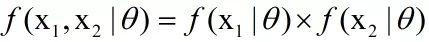

x1为第一次采样，x2为第二次采样，f为模型, theta为模型参数

其中$\theta$是未知的，因此，我们定义似然L为：
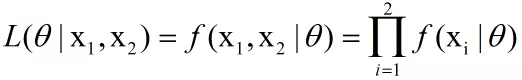
L为似然的符号

两边取ln，取ln是为了将右边的乘号变为加号，方便求导。
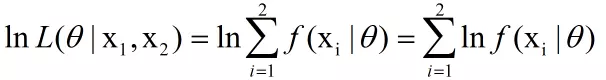
两边取ln的结果，左边的通常称之为对数似然。

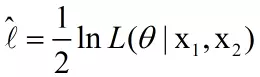这是「平均」对数似然

最大似然估计的过程，就是找一个合适的theta，使得平均对数似然的值为最大。因此，可以得到以下公式：
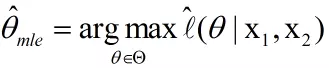最大似然估计的公式

这里讨论的是2次采样的情况，当然也可以拓展到多次采样的情况：
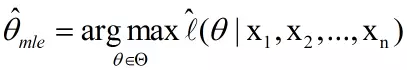
最大似然估计的公式（n次采样）

我们定义M为模型（也就是之前公式中的f），表示抽到白球的概率为theta，而抽到红球的概率为(1-theta)，因此10次抽取抽到白球7次的概率可以表示为：
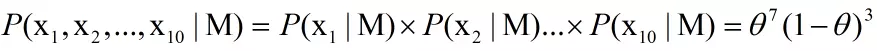
10次抽取抽到白球7次的概率

将其描述为平均似然可得：
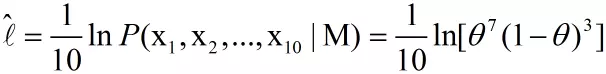10次抽取抽到白球7次的平均对数似然，抽球的情况比较简单，可以直接用平均似然来求解

那么最大似然就是找到一个合适的theta，获得最大的平均似然。因此我们可以对平均似然的公式对theta求导，并另导数为0。
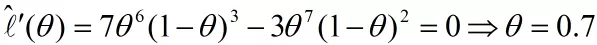
求导过程

* 最大似然估计的思想：由此可得，**当抽取白球的概率为0.7时，最可能产生10次抽取抽到白球7次的事件。**


令Dc表示训练集D中第c类样本组成的集合，假设这些集合是独立同分布的，则对参数θc，θc对于数据集Dc的似然是:

$$P(D_c|\theta_c) = \prod P(\mathbf{x}|\theta_c)$$
对$θ_c$进行激发似然估计就是去寻找能最大化似然函数的参数值$θ_c$.直观上，极大似然估计是在试图在$θ_c$的所有可能的取值中，找到一个能使数据出现最大“可能性”的最大值。

上面的式子中的连乘操作容易造成下溢，通常使用对数似然：
$$L(\theta_c) = \log P(D_c| \theta_c) = \sum_{x\in D_c} \log P(x|\theta_c)$$
此时，参数$θ_c$的极大似然估计$\hat{\theta_c}$为
$\hat{\theta_c} = argmax_{\theta_c} LL(\theta_c)$
例如，在连续属性的情形下，假设概率密度函数$p(x|c) \sim \mathcal{N}(\mu_c , \sigma^2)$,则参数$μ_c$和$σ_2$的极大似然估计为：
$\hat{\mu_c} = \frac{1}{|D_c|} \sum_{x\in D_c} x$
$\hat{\sigma_c}^2 = \frac{1}{|D_c|} \sum_{x\in D_c} (x-\hat{\mu_c} )(x-\hat{\mu_c} ^T)$
也就是说通过极大似然法得到的额正态分布均值就是样本均值，方差就是$(x-\hat{\mu_c} )(x-\hat{\mu_c} ^T)$的均值。这显然是一个符合只觉得结果，在离散属性情形下，也可以通过类似的方法来估计类条件概率。

需要注意的是这种方法虽然能够使类条件概率估计变得简单，但是估计结果准确性严重依赖于「所假设」的概率分布形式「是否符合潜在的真实数据分布」。在现实生活中往往需要应用任务本身的经验知识，“猜测”则会导致误导性的结果。

贝叶斯分类器的训练过程就是参数估计。总结最大似然法估计参数的过程，一般分为以下四个步骤：
```
1.写出似然函数；
2.对似然函数取对数，并整理；
3.求导数，令偏导数为0，得到似然方程组；
4.解似然方程组，得到所有参数即为所求。
```

* #### 朴素贝叶斯分类器

基于贝叶斯公式来估计后验概率P(c|x)主要困难在于类条件概率P(x|c)是「所有属性」上的联合概率，难以从「有限的」训练样本直接估计而得。
基于有限训练样本直接计算联合概率，在计算上将会遭遇组合爆炸问题；在数据上将会遭遇样本稀疏问题；属性越多，问题越严重。

为了避开这个障碍，朴素贝叶斯分类器采用了$“属性条件独立性假设”$: 对已知类别，假设所有属性相互独立。换言之，**假设每个属性独立的对分类结果发生影响相互独立。**“彼此独立”也就是朴素贝叶斯的朴素之处，naive，天真。

回答西瓜的例子就可以认为｛色泽	根蒂	敲声	纹理	脐部	触感｝这些属性对西瓜是好还是坏的结果所产生的影响相互独立。

基于条件独立性假设，对于多个属性的后验概率可以写成：
$$P(c|\mathbf{x}) = \frac{P(c)P(\mathbf{x}|c)}{P(\mathbf{x})} = \frac{P(c)}{P(\mathbf{x})}\prod_{i=1}^d P(x_i|c)$$
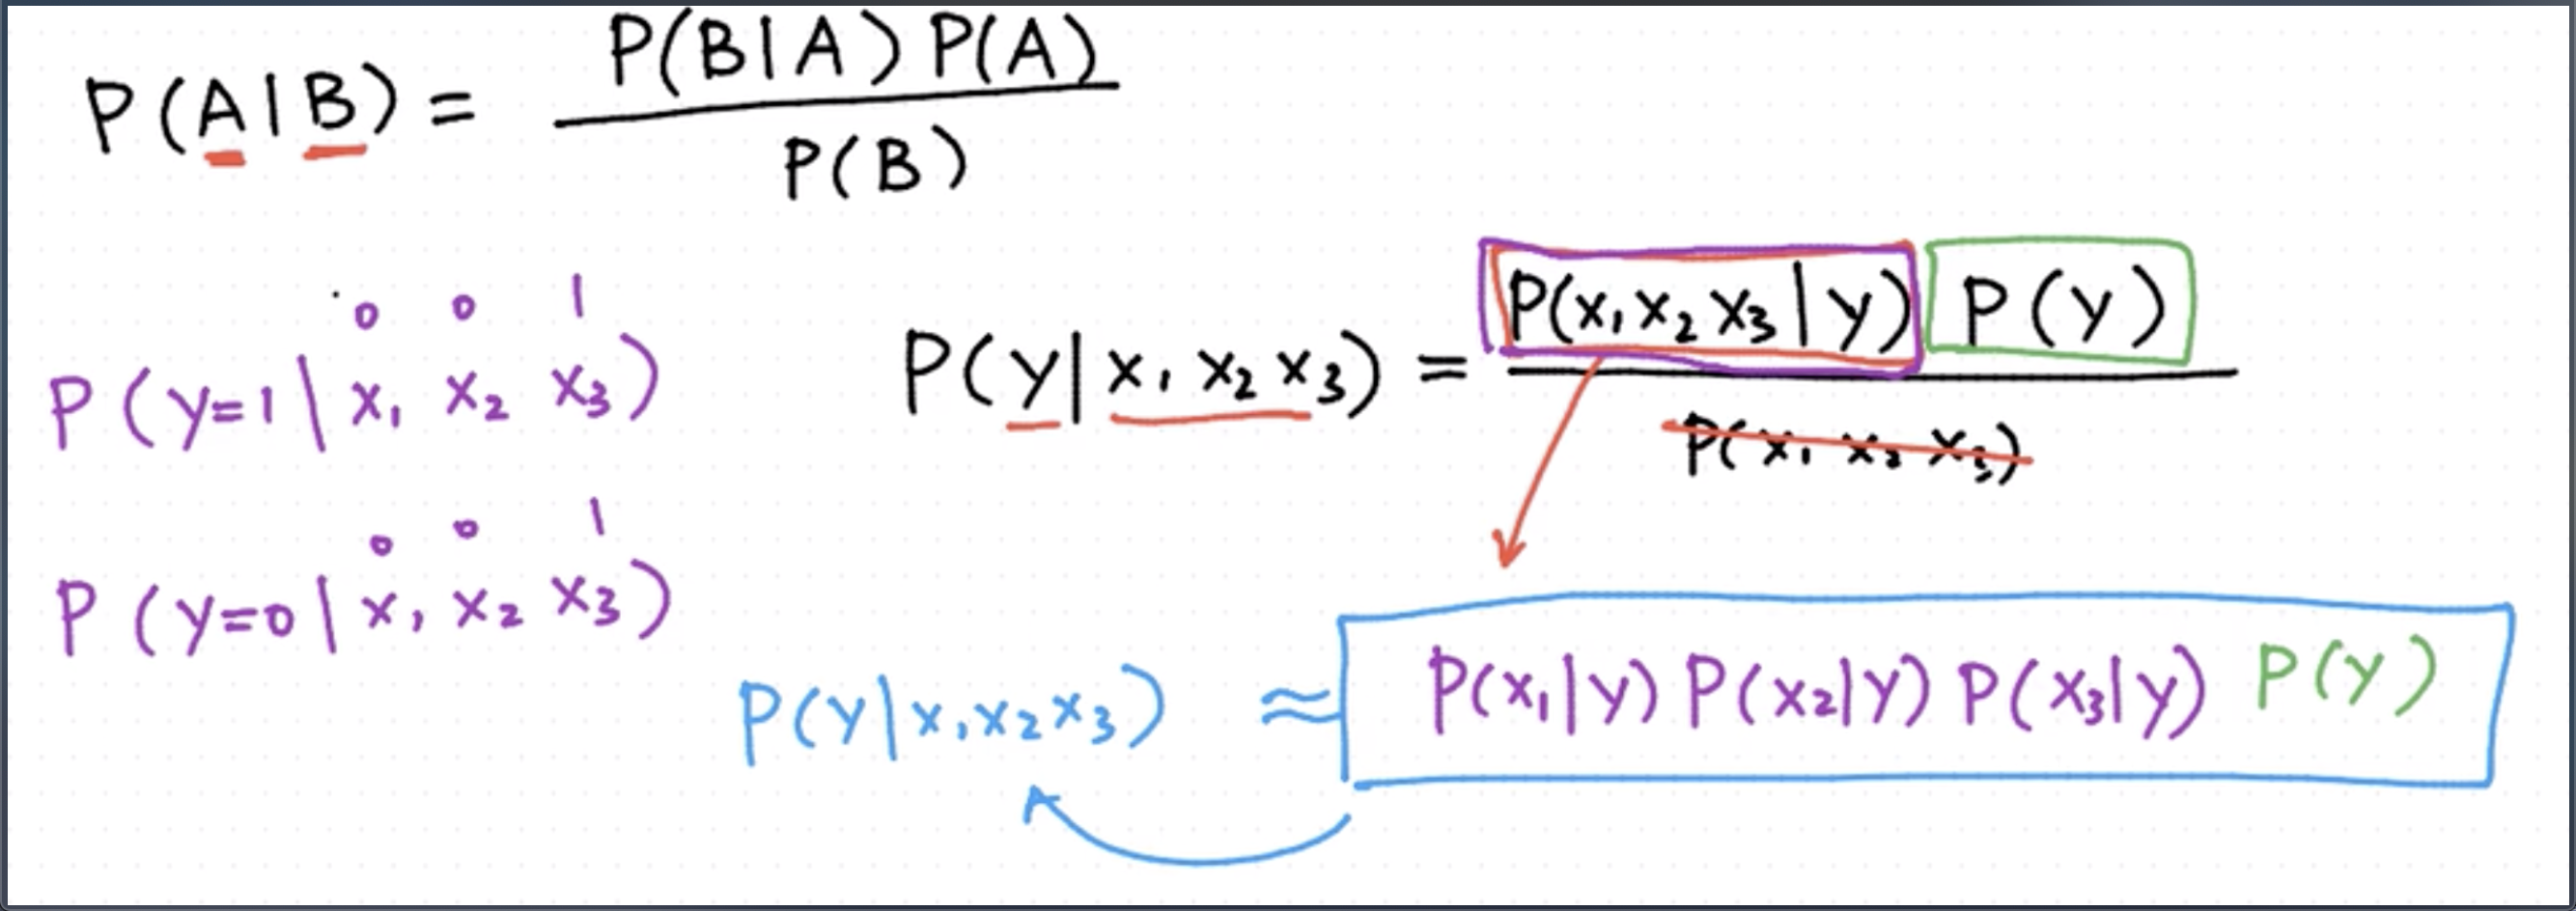

d为属性数目，$x_i$是x在第i个属性上取值。
对于所有的类别来说P(x)相同，基于极大似然的贝叶斯判定准则有朴素贝叶斯的表达式：
$$h_{nb}(\mathbf{x}) = \arg max_{c\in \mathcal{Y}}P(c)\prod_{i=1}^d P(x_i|c) \quad (1)$$


### 5. 极值问题情况下的每个类的分类概率
极值问题：一般求导=0

请注意：并不一定所有函数的极值都可以通过设置导数为0的方式求 出。也就是说，有些问题中当我们设定导数为0时，未必能直接计算出满足导数为0的点（比如逻辑回归模型），这时候就需要利用数值计算相关的技术（最典型为梯度下降法，牛顿法……）。

### 6. 下溢问题如何解决
数值下溢问题：**取对数的方式，将连乘转化为连加**，以避免数值下溢。

### 7. 零概率问题如何解决？
训练样本数量不是无限的，所以可能出现有的情况在实际中存在，但在训练样本中没有，导致为0的概率值，影响后面后验概率的计算。这时我们说模型是不平滑的，我们要使之平滑，一种方法就是将训练（学习）的方法换成贝叶斯估计。

现在看一个示例，及$P(敲声=清脆|好瓜=是)=\frac{8}{0}=0$
不论样本的其他属性如何，分类结果都会为“好瓜=否”，这样显然不太合理。

朴素贝叶斯算法的先天缺陷：其他属性携带的信息被训练集中某个分类下未出现的属性值“抹去”，造成预测出来的概率绝对为0。为了弥补这一缺陷，引入了：

* **拉普拉斯平滑的方法**：

对先验概率的分子(划分的计数)加1，分母加上类别数；对条件概率分子加1，分母加上对应特征的可能取值数量。这样在解决零概率问题的同时，也保证了概率和依然为1：
$$P(c) = \frac{{|{D_c}|}}{{|D|}} \to P(c) = \frac{{|{D_c}| + 1}}{{|D| + N}}$$
$$P({x_i}|c) = \frac{{|{D_{{x_i}|c}}|}}{{|{D_c}|}} \to P({x_i}|c) = \frac{{|{D_{{x_i}|c}}| + 1}}{{|{D_c}| + {N_i}}}$$

其中，N表示数据集中分类标签，$N_i$表示第$i$个属性的取值类别数，|D|样本容量，$|D_c|$表示类别c的记录数量，${|{D_{{x_i}|c}}|}$表示类别c中第i个属性取值为$x_i$的记录数量。

将这两个式子应用到上面的计算过程中，就可以弥补朴素贝叶斯算法的这一缺陷问题。

用西瓜的数据来看，当我们计算

P(好瓜=是)时，样本有17个，所以|D| = 17，N，好瓜标签可以分为｛是，否｝两类，所以N=2，（好瓜=是）的样本个数有8个，所以这里$|D_c|$=8。

综上，根据拉普拉斯平滑后有 $$P(好瓜=是) = \frac{{|{D_c}| + 1}}{{|D| + N}} = \frac{{|{8}| + 1}}{{|17| + 2}}$$
P（色泽=青绿|好瓜=是）时，色泽青绿的样本有8个，所以|D_c| = 8，N，色泽标签可以分为｛青绿，浅白，乌黑｝三类，所以N=3，（好瓜=是）的样本个数有3个，所以这里$|D_{c,x_i}|$=3。
综上，根据拉普拉斯平滑后有$$P（色泽=青绿|好瓜=是）= \frac{{|{D_{{x_i}|c}}| + 1}}{{|{D_c}| + {N_i}}}=\frac{{|{3}}| + 1}{{|{8}| + {3}}}$$
同理，分析可知，之前不合理的$P(敲声=清脆|好瓜=是)=\frac{8}{0}=0$在进行拉普拉斯平滑后为$$ P(敲声=清脆|好瓜=是)= \frac{{|{D_{{x_i}|c}}| + 1}}{{|{D_c}| + {N_i}}}=\frac{{|{0}}| + 1}{{|{8}| + {3}}}$$显然结果不是0，使结果变得合理。

### 8. sklearn参数详解
1. 高斯朴素贝叶斯算法是假设特征的可能性(即概率)为高斯分布。
```
class sklearn.naive_bayes.GaussianNB(priors=None)
参数：
priors:先验概率大小，如果没有给定，模型则根据样本数据自己计算（利用极大似然法）。
var_smoothing：可选参数，所有特征的最大方差
属性：
class_prior_:每个样本的概率
class_count:每个类别的样本数量
classes_:分类器已知的标签类型
theta_:每个类别中每个特征的均值
sigma_:每个类别中每个特征的方差
epsilon_:方差的绝对加值方法
# 贝叶斯的方法和其他模型的方法一致。
fit(X,Y):在数据集(X,Y)上拟合模型。
get_params():获取模型参数。
predict(X):对数据集X进行预测。
predict_log_proba(X):对数据集X预测，得到每个类别的概率对数值。predict_proba(X):对数据集X预测，得到每个类别的概率。
score(X,Y):得到模型在数据集(X,Y)的得分情况。
```

根据李航老师的代码构建自己的朴素贝叶斯模型

这里采用GaussianNB 高斯朴素贝叶斯（正态分布）,概率密度函数（已知分类为 $y_k$, 特征值取值 $x_i$ 的概率）
$$P(x_{i}|y_{k}) = \frac{1}{\sqrt{2\pi\sigma_{y_{k}}^{2}}}exp( -\frac{(x_{i}-\mu_{y_{k}})^2}  {2\sigma_{y_{k}}^{2}}   )$$
数学期望(mean)：$\mu$ （均值严格来说就是期望）

方差：$\sigma ^2=\frac{1}{n}\sum_i^n(x_i-\overline x)^2$

https://github.com/fengdu78/lihang-code/blob/master/%E7%AC%AC04%E7%AB%A0%20%E6%9C%B4%E7%B4%A0%E8%B4%9D%E5%8F%B6%E6%96%AF/4.NaiveBayes.ipynb

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
clf = GaussianNB().fit(X_train, y_train)
print ("Classifier Score:", clf.score(X_test, y_test))

Classifier Score: 0.9666666666666667


In [69]:
import math
from pprint import pprint
class NaiveBayes:
    def __init__(self):
        self.model = None

    # 数学期望
    @staticmethod
    def mean(X):
        """计算均值
        Param: X : list or np.ndarray
        
        Return:
            avg : float
        
        """
        # ========= show me your code ==================
        avg = sum(X)/len(X)
        # ========= show me your code ==================
        return avg

    # 标准差（方差）
    def stdev(self, X):
        """计算标准差
        Param: X : list or np.ndarray
        
        Return:
            res : float
        
        """
        res = 0.0
        # ========= show me your code ==================
        mean = self.mean(X)
        for x in X:
            res += (x-mean)**2
        res /= len(X)
        # ========= show me your code ==================
        return res
        
    # 概率密度函数
    def gaussian_probability(self, x, mean, stdev):
        """根据均值和标注差计算x符号该高斯分布的概率
        Parameters:
        ----------
        x : 输入（单个的数字）
        mean : 均值
        stdev : 标准差
        
        Return:
        
        res : float， x符合的概率值
            
        """
        # ========= show me your code ==================
        p = np.exp(-((x-mean)**2)/(2*stdev))/np.sqrt(2*np.pi*stdev)  #高斯正态分布概率密度函数
        # ========= show me your code ==================
        
        return p
        
    # 处理X_train
    def summarize(self, train_data):
        """给定类目0/1/2，计算每个特征对应数据的(均值,标准差)
        Param: train_data : list
        
        Return : [mean, stdev]
        """
        # ========= show me your code ==================
        summaries = [self.mean(train_data), self.stdev(train_data)]
        summaries = list(zip(*list(summaries)))   #zip*即解压，zip 的逆过程
        
        # 一步：summaries = [(self.mean(i), self.stdev(i)) for i in zip(*train_data)]
        # ========= show me your code ==================
        return summaries

    # 分类别求出数学期望和标准差
    def fit(self, X, y):
        """
        self.model: 每个类目0/1/2下，每个特征的，均值与标准差，即把summaries的结果包装成字典
        """
        labels = list(set(y))
        data = {label: [] for label in labels}
        for f, label in zip(X, y):
            data[label].append(f)
        self.model = {
            label: self.summarize(value) for label, value in data.items()
        }
        return 'gaussianNB train done!'

    # 计算概率
    def calculate_probabilities(self, input_data):
        """计算数据在各个高斯分布下的概率
        Paramter:
        input_data : 输入数据(每次传入单个 test 样本，如[4.4,  3.2,  1.3,  0.2])
        
        Return:
        probabilities : {label : p}
        """
        probabilities = {}
        # ========= show me your code ==================
        for label, value in self.model.items():  #每个品类0/1/2
            probabilities[label] = 1
            for i in range(len(value)):  #i对应每个特征
                mean, stdev = value[i]
                #每个标签，概率连乘，连乘表示概率独立分布，表示已知 y_k 下组合 (x_1,x_2,x_3,x_4)出现的概率，即后验概率
                probabilities[label] *= self.gaussian_probability(input_data[i], mean, stdev)
        # ========= show me your code ==================
        return probabilities

    # 类别
    def predict(self, X_test):
        label_list = sorted(self.calculate_probabilities(X_test).items(), key=lambda x: x[-1]) #按照gauss概率从低到高排序
        label = label_list[-1][0]  #选择gauss概率最高的作为标签
        return label
    
    # 计算得分
    def score(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right += 1

        return right / float(len(X_test))

In [70]:
model = NaiveBayes()
model.fit(X_train, y_train)
give = [4.4,  3.2,  1.3,  0.2]
print('预测结果为', model.predict(give))

# X_test为n组特征值
model.score(X_test, y_test)

预测结果为 0


0.9666666666666667

### 9. 优缺点
优点
1. 稳定的分类效率。
2. 对小规模的数据表现很好，能处理多分类任务；适合增量式训练，尤其是数据量超出内存时，可以一批批的去增量训练。
3. 对缺失数据不太敏感，常用于文本分类。

缺点:
1. 属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。对于这一点，有半朴素贝叶斯之类的算法通过考虑部分关联性适度改进。
2. 需要知道先验概率，且先验概率很多时候取决于假设，假设的模型可以有很多种，因此在某些时候会由于假设的先验模型的原因导致预测效果不佳。
3. 由于我们是通过先验和数据来决定后验的概率从而决定分类，所以分类决策存在一定的错误率。
4. 对输入数据的表达形式很敏感。

### 10. 参考文献
西瓜书
https://samanthachen.github.io/2016/08/05/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E5%91%A8%E5%BF%97%E5%8D%8E_%E7%AC%94%E8%AE%B07/

https://www.jianshu.com/p/f1d3906e4a3e

https://zhuanlan.zhihu.com/p/66117273

https://zhuanlan.zhihu.com/p/39780650

https://blog.csdn.net/zrh_CSDN/article/details/81007851